# Script to run a Random Forest Model on our transformed data

Done with filtered transaction data

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)

# Read in our transformed data
loans_base_df = pd.read_csv('./csv_files/loans_merged_filtered_transactions.csv')

# Column Transformer

In [16]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Numerical Variables
num_var = [ #'amount_order','k_symbol_LEASING',
            #'k_symbol_Other', 'k_symbol_POJISTNE',
            #'k_symbol_SIPO', 'k_symbol_UVER',
            'amount_sum',
            'amount_mean', 'amount_std', 
            'balance_min', 'balance_max', 'balance_mean', 'balance_std',
            'type_PRIJEM_sum', 'type_VYBER_sum',
            'type_VYDAJ_sum', 'operation_Other_sum', 'operation_PREVOD NA UCET_sum',
            'operation_PREVOD Z UCTU_sum', 'operation_VKLAD_sum',
            'operation_VYBER_sum', 'operation_VYBER KARTOU_sum',
            #'k_symbol_DUCHOD_sum', 
            'k_symbol_Other_sum', 'k_symbol_POJISTNE_sum',
            'k_symbol_SANKC. UROK_sum', 'k_symbol_SIPO_sum', 'k_symbol_SLUZBY_sum',
            'k_symbol_UROK_sum', 
            #'k_symbol_UVER_sum', 
            'A4', 'A5', 'A6', 'A7', 'A8',
            'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16']
# Ordinal Variables
ord_var = ['gender','frequency','type_y']

# Extra Variables
date_var = ['date_x','date_y', 'date_min', 'date_max','birth_date']
drop_var = ['amount_x','duration','payments','loan_id','account_id','district_id','type_x','issued']
#pass_col = 

#Replace inf with nan
loans_base_df = loans_base_df.replace([np.inf, -np.inf], np.nan)

# Set Target Variables
target_raw = loans_base_df['status'].copy()
target_raw[(target_raw == 'A') | (target_raw == 'C')] = 0
target_raw[(target_raw == 'B')  | (target_raw == 'D')] = 1

#Build a column transforrner

# Create our transformers
numeric_transformer = SimpleImputer(missing_values = np.nan, strategy='median')
  
binary_transformer = OneHotEncoder(handle_unknown='ignore')

ordinal_transformer = OneHotEncoder(categories  = [ ['M','F'],
                                                     ['POPLATEK PO OBRATU','POPLATEK TYDNE','POPLATEK MESICNE'],
                                                     ['No Card','junior','classic','gold']])
# Create the preprocessor
preprocessor = ColumnTransformer(transformers = [ ('numerical', numeric_transformer, num_var),
                                                  ('ordinal',ordinal_transformer, ord_var)],
                                                  #('date','passthrough', date_var)],
                                                   remainder = 'drop')
# Set our X and y variables for use in our model
X = loans_base_df.drop(columns = 'status')
y = target_raw 


#Seperate our train and test splits
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2, random_state = 42)


In [18]:
# Use the transformer 

X_train_transformed = preprocessor.fit_transform(X_train)
X_val_transformed = preprocessor.fit_transform(X_val)
y_val = y_val.astype(bool)

In [19]:
# Convert transformed data into dataframe

ord_var_list = ['M','F'] +  ['POPLATEK PO OBRATU','POPLATEK TYDNE','POPLATEK MESICNE'] + ['No Card','junior','classic','gold']

transformed_columns = num_var +  ord_var_list # + date_var

print(X_train_transformed.shape)
print(len(transformed_columns))

X_train_transform_df = pd.DataFrame(X_train_transformed, columns = transformed_columns)

X_train_transform_df.head()

(545, 44)
44


,amount_sum,amount_mean,amount_std,balance_min,balance_max,balance_mean,balance_std,type_PRIJEM_sum,type_VYBER_sum,type_VYDAJ_sum,operation_Other_sum,operation_PREVOD NA UCET_sum,operation_PREVOD Z UCTU_sum,operation_VKLAD_sum,operation_VYBER_sum,operation_VYBER KARTOU_sum,k_symbol_Other_sum,k_symbol_POJISTNE_sum,k_symbol_SANKC. UROK_sum,k_symbol_SIPO_sum,k_symbol_SLUZBY_sum,k_symbol_UROK_sum,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,M,F,POPLATEK PO OBRATU,POPLATEK TYDNE,POPLATEK MESICNE,No Card,junior,classic,gold
0,1221042.0,13875.477273,16061.932578,500.0,117828.0,60781.340909,21161.072337,645094.0,100598.0,475350.0,3442.0,0.0,641152.0,500.0,573148.0,2800.0,1217450.0,0.0,0.0,0.0,150.0,3442.0,145688.0,22.0,41.0,13.0,2.0,5.0,40.7,8544.0,1.2,1.86,109.0,2719.0,2906.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,692857.0,4099.745562,5307.314583,500.0,48157.0,29941.976331,7237.151742,355102.0,0.0,337755.0,2494.0,129780.0,0.0,352608.0,207975.0,0.0,576744.0,55854.0,0.0,57510.0,255.0,2494.0,122603.0,25.0,21.0,6.0,2.0,8.0,80.0,8991.0,1.3,2.01,128.0,5198.0,5273.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,472514.0,8289.719298,11105.864662,-670.0,82785.0,30491.105263,24000.242149,249501.0,109326.0,113687.0,1764.0,0.0,0.0,247737.0,223013.0,0.0,470663.0,0.0,12.0,0.0,75.0,1764.0,323870.0,0.0,0.0,0.0,1.0,1.0,100.0,10673.0,4.7,5.44,100.0,18782.0,18347.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1179010.0,12542.659574,14824.153600,700.0,109016.0,38819.244681,18712.621231,600842.0,73567.0,504601.0,2189.0,150601.0,590353.0,8300.0,427567.0,0.0,1025120.0,0.0,0.0,150601.0,1100.0,2189.0,58796.0,22.0,16.0,7.0,1.0,5.0,51.9,9045.0,3.1,3.60,124.0,1845.0,1879.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,361369.0,5646.390625,6783.211883,900.0,55816.0,36039.140625,9064.825891,197446.0,0.0,163923.0,1570.0,37278.0,0.0,195876.0,126645.0,0.0,347826.0,0.0,0.0,11868.0,105.0,1570.0,1204953.0,0.0,0.0,0.0,1.0,1.0,100.0,12541.0,0.2,0.43,167.0,85677.0,99107.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [1]:
# Check for nan's
X_train_transform_df.isna().sum()

NameError: name 'X_train_transform_df' is not defined

# Build and Run The Model

In [21]:
from sklearn.ensemble import RandomForestClassifier
import eli5

#Initialize Model
rf_model = RandomForestClassifier(oob_score= True, random_state = 42)
rf_model.fit(X_train_transform_df, y_train.astype(bool))
eli5.show_weights(rf_model, feature_names = transformed_columns)

Weight,Feature
0.1319 ± 0.2130,balance_min
0.0820 ± 0.1720,k_symbol_SANKC. UROK_sum
0.0552 ± 0.0837,balance_mean
0.0511 ± 0.0658,balance_std
0.0368 ± 0.0867,k_symbol_Other_sum
0.0347 ± 0.0711,amount_sum
0.0345 ± 0.0880,type_PRIJEM_sum
0.0333 ± 0.0743,operation_VKLAD_sum
0.0332 ± 0.0610,k_symbol_UROK_sum
0.0319 ± 0.0709,operation_VYBER_sum


In [22]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Initialize our tuning grid
param_grid = {
     'ccp_alpha': [ 0.0, 0.01 ],
     'class_weight' : [ 'balanced'],
     'max_depth': [ 5, 10, 15, None],
     'max_features': ['auto'],
     'max_leaf_nodes': [ 10, 12, 14 , None],
     'min_impurity_decrease': [ 0.0, 0.001 ],
     'min_samples_leaf': [ 2, 4, 6],
     'min_samples_split': [ 2, 3, 4, 5 ],
     'min_weight_fraction_leaf': [ 0.0, 0.01 ],
     'n_estimators': [50, 65, 80, 95, 110, 150]
}

#Set the grid search
grid_search = RandomizedSearchCV(rf_model, param_grid, cv=5, verbose=1, random_state=42, n_iter=300, scoring='balanced_accuracy')

#Fit the model
grid_search.fit(X_train_transform_df, y_train.astype(bool))

print(("best RF from grid search: %.3f"
       % grid_search.score(X_val_transformed, y_val)))

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


best RF from grid search: 0.827


[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:  5.4min finished


In [23]:
# Put our results in a dataframe
results  = pd.DataFrame(grid_search.cv_results_)

y_val.sum()

16

In [24]:
# See the best scores
results.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_weight_fraction_leaf,param_min_samples_split,param_min_samples_leaf,param_min_impurity_decrease,param_max_leaf_nodes,param_max_features,param_max_depth,param_class_weight,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
173,0.087389,0.001742,0.005097,0.000076,50,0.01,4,4,0.001,10,auto,15,balanced,0,"{'n_estimators': 50, 'min_weight_fraction_leaf...",0.614691,0.765893,0.708763,0.698024,0.771048,0.711684,0.056684,1
117,0.142445,0.004618,0.007516,0.000520,50,0.01,2,4,0,10,auto,None,balanced,0.01,"{'n_estimators': 50, 'min_weight_fraction_leaf...",0.614691,0.765893,0.703608,0.698024,0.776203,0.711684,0.057898,1
196,0.154380,0.013941,0.007742,0.000537,80,0.01,4,4,0.001,10,auto,None,balanced,0.01,"{'n_estimators': 80, 'min_weight_fraction_leaf...",0.614691,0.771048,0.745275,0.646048,0.729381,0.701289,0.060235,3
5,0.202559,0.016564,0.010134,0.000445,80,0.01,4,4,0,10,auto,10,balanced,0.01,"{'n_estimators': 80, 'min_weight_fraction_leaf...",0.614691,0.771048,0.745275,0.646048,0.729381,0.701289,0.060235,3
103,0.191975,0.001821,0.009959,0.000266,80,0.01,5,4,0.001,10,auto,10,balanced,0.01,"{'n_estimators': 80, 'min_weight_fraction_leaf...",0.614691,0.771048,0.745275,0.646048,0.729381,0.701289,0.060235,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,0.216019,0.006806,0.011341,0.001516,110,0.01,3,2,0,None,auto,None,balanced,0,"{'n_estimators': 110, 'min_weight_fraction_lea...",0.541667,0.656357,0.599227,0.536512,0.661512,0.599055,0.053646,296
130,0.316068,0.020965,0.015265,0.001327,110,0.01,4,2,0,None,auto,15,balanced,0,"{'n_estimators': 110, 'min_weight_fraction_lea...",0.541667,0.656357,0.599227,0.536512,0.661512,0.599055,0.053646,296
0,0.193215,0.007992,0.010131,0.000680,80,0,5,2,0.001,None,auto,None,balanced,0,"{'n_estimators': 80, 'min_weight_fraction_leaf...",0.541667,0.661512,0.567869,0.541667,0.666667,0.595876,0.056535,298
242,0.152943,0.004093,0.007732,0.000065,80,0,5,2,0,None,auto,15,balanced,0,"{'n_estimators': 80, 'min_weight_fraction_leaf...",0.541667,0.703179,0.531357,0.541667,0.625000,0.588574,0.066536,299


# Confusion Matrix for our best results

In [25]:
y_pred_val = grid_search.predict(X_val_transformed)

from sklearn.metrics import confusion_matrix

x = confusion_matrix(y_val, y_pred_val)

tn = x[0,0]  
fp = x[0,1] 
fn = x[1,0] 
tp = x[1,1]

print([tp,fp])
print([fn,tn])

[11, 4]
[5, 117]


In [26]:
# Feature Importances

eli5.show_weights(grid_search.best_estimator_, feature_names = transformed_columns)

Weight,Feature
0.1013 ± 0.2532,balance_min
0.0981 ± 0.2692,operation_PREVOD NA UCET_sum
0.0673 ± 0.2069,k_symbol_SANKC. UROK_sum
0.0653 ± 0.1888,balance_mean
0.0611 ± 0.1744,balance_std
0.0594 ± 0.1640,k_symbol_SIPO_sum
0.0448 ± 0.1564,No Card
0.0379 ± 0.1429,type_PRIJEM_sum
0.0352 ± 0.1149,type_VYDAJ_sum
0.0301 ± 0.1313,operation_Other_sum


In [27]:
# See our best parameters

grid_search.best_params_

{'n_estimators': 50,
 'min_weight_fraction_leaf': 0.01,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'min_impurity_decrease': 0.0,
 'max_leaf_nodes': 10,
 'max_features': 'auto',
 'max_depth': None,
 'class_weight': 'balanced',
 'ccp_alpha': 0.01}

# Apply Model To Remaining Customers

In [28]:
# Read in our data that doesn't have loan info
account_df = pd.read_csv("./csv_files/accounts_merged_all_transactions.csv")

# Run the transformer on it
account_transformed = preprocessor.fit_transform(account_df)

# Put it into a Dataframe
account_transform_df = pd.DataFrame(account_transformed, columns = transformed_columns)

In [29]:
account_transform_df['account_id'] = account_df['account_id']

In [30]:
account_transform_df.shape

(4500, 45)

In [31]:
loans_base_df.shape

(682, 58)

In [32]:
# Find how many accounts don't already have loans...
(~account_transform_df['account_id'].isin(loans_base_df['account_id'])).sum()

3818

In [33]:
# Check for Na's
account_df.isna().sum()

account_id                         0
district_id                        0
frequency                          0
date                               0
amount_order                     742
k_symbol_LEASING                 742
k_symbol_Other                   742
k_symbol_POJISTNE                742
k_symbol_SIPO                    742
k_symbol_UVER                    742
date_min                           0
date_max                           0
amount_sum                         0
amount_mean                        0
amount_std                         0
balance_min                        0
balance_max                        0
balance_mean                       0
balance_std                        0
type_PRIJEM_sum                    0
type_VYBER_sum                     0
type_VYDAJ_sum                     0
operation_Other_sum                0
operation_PREVOD NA UCET_sum       0
operation_PREVOD Z UCTU_sum        0
operation_VKLAD_sum                0
operation_VYBER_sum                0
o

In [34]:
# Filter our dataframe to remove all clients that already have loans

account_no_loan_df = account_transform_df[(~account_transform_df['account_id'].isin(loans_base_df['account_id']))]

account_no_loan_df = account_no_loan_df.drop(columns='account_id')

account_no_loan_df.head()

,amount_sum,amount_mean,amount_std,balance_min,balance_max,balance_mean,balance_std,type_PRIJEM_sum,type_VYBER_sum,type_VYDAJ_sum,operation_Other_sum,operation_PREVOD NA UCET_sum,operation_PREVOD Z UCTU_sum,operation_VKLAD_sum,operation_VYBER_sum,operation_VYBER KARTOU_sum,k_symbol_Other_sum,k_symbol_POJISTNE_sum,k_symbol_SANKC. UROK_sum,k_symbol_SIPO_sum,k_symbol_SLUZBY_sum,k_symbol_UROK_sum,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,M,F,POPLATEK PO OBRATU,POPLATEK TYDNE,POPLATEK MESICNE,No Card,junior,classic,gold
0,375192.0,1569.841004,1732.115246,1000.0,30415.0,15994.079498,3656.858500,194322.0,0.0,180870.0,3067.0,98080.0,165555.0,25700.0,82790.0,0.0,273445.0,0.0,0.0,98080.0,600.0,3067.0,70699.0,60.0,13.0,2.0,1.0,4.0,65.3,8968.0,2.8,3.35,131.0,1740.0,1910.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,295030.0,2521.623932,2951.300633,1000.0,53447.0,26973.529915,10508.728242,173062.0,0.0,121968.0,2073.0,65013.0,0.0,170989.0,56955.0,0.0,232000.0,46007.0,0.0,14755.0,195.0,2073.0,95616.0,65.0,30.0,4.0,1.0,6.0,51.4,9307.0,3.8,4.43,118.0,2616.0,3040.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,350986.0,1887.021505,1956.829637,800.0,34870.0,21753.526882,5009.976472,192349.0,0.0,158637.0,2747.0,98812.0,188802.0,800.0,59825.0,0.0,98740.0,0.0,0.0,60262.0,435.0,2747.0,107870.0,84.0,29.0,6.0,1.0,6.0,58.0,8754.0,3.8,4.31,137.0,3804.0,3868.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,166891.0,1986.797619,1981.162764,600.0,32036.0,25090.023810,4752.452095,97489.0,0.0,69402.0,1566.0,37352.0,95323.0,600.0,32050.0,0.0,32440.0,0.0,0.0,37352.0,210.0,1566.0,58796.0,22.0,16.0,7.0,1.0,5.0,51.9,9045.0,3.1,3.60,124.0,1845.0,1879.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5,647584.0,2632.455285,2655.001376,900.0,51879.0,34547.353659,7331.711741,347616.0,0.0,299968.0,6597.0,185838.0,340119.0,900.0,114130.0,0.0,114340.0,0.0,0.0,185838.0,690.0,6597.0,121947.0,37.0,28.0,7.0,3.0,11.0,70.5,8541.0,2.5,2.97,131.0,3496.0,3839.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


# Predict on customers without loans

In [35]:
# Predict thier loan status using our best estimator from above
y_acc_pred_val = grid_search.best_estimator_.predict(account_no_loan_df)

In [36]:
no_loans_df = account_no_loan_df[y_acc_pred_val==1]

preapp_loans_df = account_no_loan_df[y_acc_pred_val==0]

# See how many are predicted of each
print(no_loans_df.shape)
print(preapp_loans_df.shape)

(280, 44)
(3538, 44)


In [37]:
# Check on the differences between the two groups

X_zero = no_loans_df
X_one = preapp_loans_df

A = (X_one.describe().T - X_zero.describe().T)

print(A.sort_values(by ='mean', ascending=False))

                               count           mean            std  \
operation_PREVOD NA UCET_sum  3258.0  124623.259337   52350.566141   
k_symbol_SIPO_sum             3258.0   72124.020201    -789.645514   
operation_PREVOD Z UCTU_sum   3258.0   30515.364399   28868.612685   
balance_min                   3258.0    3839.696219   -4905.370151   
balance_mean                  3258.0    3733.099362      -5.633843   
operation_VYBER KARTOU_sum    3258.0    3265.917185    9183.643339   
k_symbol_UROK_sum             3258.0     445.915424   -1834.414208   
operation_Other_sum           3258.0     445.915424   -1834.414208   
A5                            3258.0       1.488367      -1.905003   
A6                            3258.0       0.786916      -0.944561   
A14                           3258.0       0.497977      -1.047511   
A9                            3258.0       0.241910      -0.040487   
POPLATEK MESICNE              3258.0       0.094807      -0.136652   
classic             

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


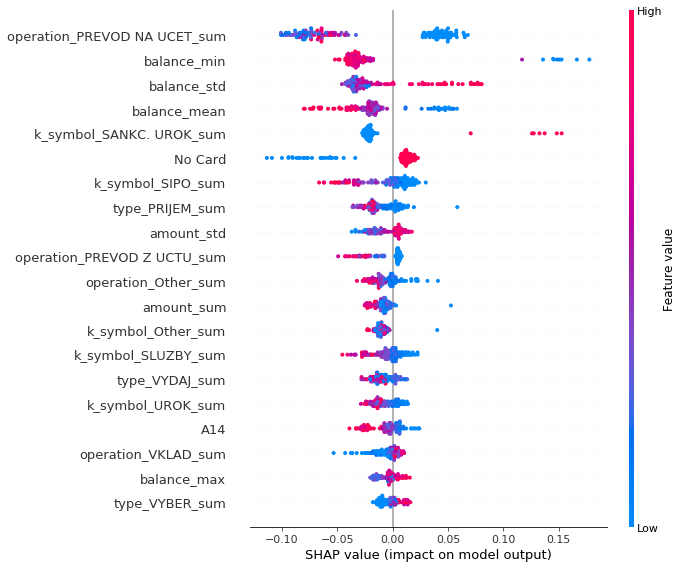

In [38]:
# Do Some SHAP value!?!?!?!

import shap

rf_explainer = shap.TreeExplainer(grid_search.best_estimator_)
rf_shap_values = rf_explainer.shap_values(X_val_transformed)

shap.initjs()
shap.force_plot(rf_explainer.expected_value[1],
                rf_shap_values[1],
                feature_names= transformed_columns)

shap.initjs()
shap.summary_plot(rf_shap_values[1],
                  features = X_val_transformed, 
                  feature_names = transformed_columns)